# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Step 2: Generating random data for the social media data

In [5]:
# Define categories for the social media experiment
categories = [
    "Food", "Travel", "Fashion", "Fitness", "Music",
    "Culture", "Family", "Health"
]

In [6]:
# Set the number of records
n = 500

In [7]:
# Generate the random data dictionary
data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

# Step 3: Loading the data into a Pandas DataFrame and Exploring the data

In [8]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

In [ ]:
# Preview of the first rows
print(df.head())

        Date Category  Likes
0 2021-01-01     Food   6213
1 2021-01-02   Family   6667
2 2021-01-03   Family   7794
3 2021-01-04    Music    688
4 2021-01-05   Family   8960


In [ ]:
# Print of dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


In [14]:
# Print of dataframe description
print(df.describe())

                      Date        Likes
count                  500   500.000000
mean   2021-09-07 12:00:00  4966.618000
min    2021-01-01 00:00:00     3.000000
25%    2021-05-05 18:00:00  2362.000000
50%    2021-09-07 12:00:00  5112.000000
75%    2022-01-10 06:00:00  7754.500000
max    2022-05-15 00:00:00  9891.000000
std                    NaN  2946.856418


In [21]:
# Count of each ‘Category’ element
Category_Elements = df['Category'].value_counts()
print(Category_Elements)


Category
Family     70
Culture    70
Fashion    66
Music      63
Fitness    63
Travel     62
Food       57
Health     49
Name: count, dtype: int64


# Step 4: Cleaning the data


In [29]:
# Check if any null values exist in the DataFrame
df.isnull().values.any()

np.False_

In [27]:
# Count null values per column
df.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

In [ ]:
# Remove duplicate rows
df.drop_duplicates()

,Date,Category,Likes
0,2021-01-01,Food,6213
1,2021-01-02,Family,6667
2,2021-01-03,Family,7794
3,2021-01-04,Music,688
4,2021-01-05,Family,8960
...,...,...,...
495,2022-05-11,Fitness,4983
496,2022-05-12,Culture,3778
497,2022-05-13,Fashion,5897
498,2022-05-14,Culture,952


In [32]:
# 3. Convert 'Date' column to datetime format 
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
# 4. Convert 'Likes' column to integer type
df['Likes'] = df['Likes'].astype(int)

# Step 5: Visualizing and Analyzing the data

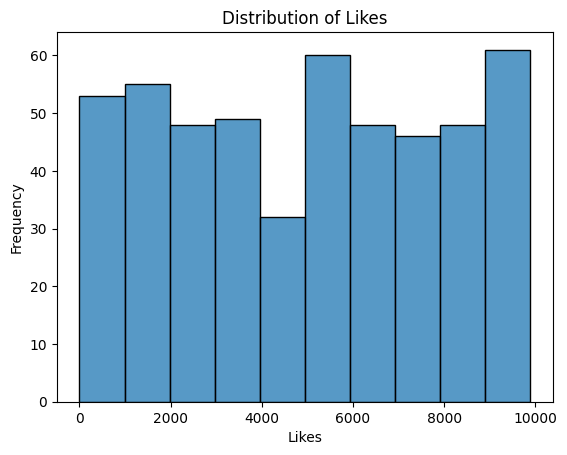

In [43]:
# Histogram plot of Likes
sns.histplot( df['Likes'])
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

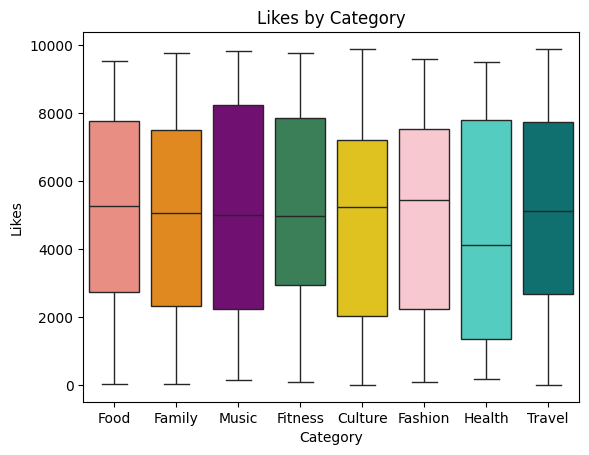

In [48]:
# Boxplot of Likes per Category
custom_palette = {
    "Food": "salmon",
    "Travel": "teal",
    "Fashion": "pink",
    "Fitness": "seagreen",
    "Music": "purple",
    "Culture": "gold",
    "Family": "darkorange",
    "Health": "turquoise"
}
sns.boxplot(x='Category', y='Likes', data=df,  hue='Category', palette=custom_palette, legend=False)
plt.title('Likes by Category')
plt.show()

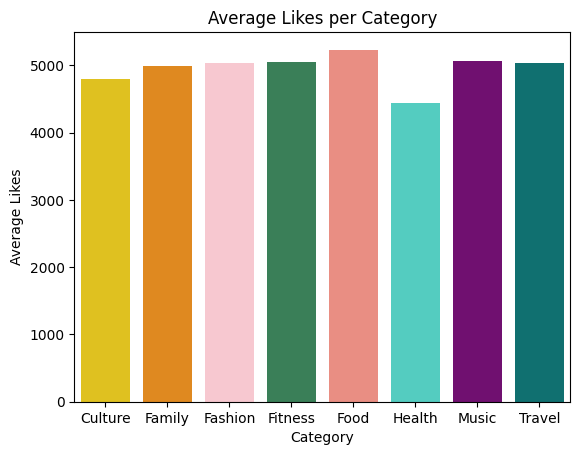

In [49]:
# Bar plot of average Likes per Category
custom_palette = {
    "Food": "salmon",
    "Travel": "teal",
    "Fashion": "pink",
    "Fitness": "seagreen",
    "Music": "purple",
    "Culture": "gold",
    "Family": "darkorange",
    "Health": "turquoise"
}

avg_likes = df.groupby('Category')['Likes'].mean().reset_index()

sns.barplot(x='Category', y='Likes', data=avg_likes, hue='Category', palette=custom_palette, legend=False)
plt.title('Average Likes per Category')
plt.xlabel('Category')
plt.ylabel('Average Likes')
plt.show()

In [ ]:
# Statisitcal analysis of Likes
print("Overall mean of Likes:", df['Likes'].mean())
print("\nMean Likes by Category:")
print(df.groupby('Category')['Likes'].mean())

Overall mean of Likes: 4966.618

Mean Likes by Category:
Category
Culture    4801.514286
Family     4988.942857
Fashion    5038.893939
Fitness    5049.380952
Food       5233.771930
Health     4440.346939
Music      5063.333333
Travel     5038.822581
Name: Likes, dtype: float64
